In [163]:
import pandas as pd
from pathlib import Path
import numpy as np

In [164]:
isinstance(True, int)

True

In [165]:
int(True)

1

In [166]:
True + 10

11

# Perform Data Quality Checks

In [196]:
co2 = Path('../../datasets/Ch7/co2_missing.csv')
ecom = Path('../../datasets/Ch7/clicks_missing_multiple.csv')
co2_df = pd.read_csv(co2)
ecom_df = pd.read_csv(ecom, parse_dates=['date'])

In [197]:
co2_df.shape

(226, 2)

In [169]:
ecom_df.head()

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784
1,2008-04-02,43.079056,1.0,24738
2,NaT,43.842609,NaN,15209
3,NaT,NaN,1.0,14018
4,NaT,43.941176,1.0,11974


In [170]:
co2_df.head()

,year,co2
0,1750,0.0125
1,1760,0.0128
2,1770,0.0150
3,1780,0.0169
4,1790,0.0206


In [171]:
co2_df.isnull().sum()

year     0
co2     25
dtype: int64

In [172]:
# using isna()
co2_df.isna().sum()

year     0
co2     25
dtype: int64

In [173]:
ecom_df.isna().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [174]:
# using isnull()
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [175]:
# using isnull()
ecom_df.isnull().sum().sum()

20

In [176]:
co2_df[190:195]

,year,co2
190,1985,NaN
191,1986,NaN
192,1987,NaN
193,1988,4.2953
194,1989,4.2782


In [177]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [178]:
ecom_df.isnull().values.any()

True

In [179]:
co2_df.isnull().values.any()

True

In [180]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [181]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    226 non-null    int64  
 1   co2     201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.7 KB


In [182]:
co2_df.describe(include='all', 
                datetime_is_numeric=True)

,year,co2
count,226.000000,201.000000
mean,1906.902655,1.590015
std,66.543281,1.644182
min,1750.000000,0.000000
25%,1851.250000,0.076400
50%,1907.500000,0.935100
75%,1963.750000,2.807600
max,2020.000000,4.907900


In [183]:
ecom_df.describe(include='all', 
                 datetime_is_numeric=True)

,date,price,location,clicks
count,131,134.000000,134.000000,121
unique,NaN,NaN,NaN,119
top,NaN,NaN,NaN,?
freq,NaN,NaN,NaN,2
mean,2008-06-08 22:32:03.664122112,43.480221,1.694030,NaN
min,2008-04-01 00:00:00,42.207018,1.000000,NaN
25%,2008-05-07 12:00:00,43.038050,1.000000,NaN
50%,2008-06-09 00:00:00,43.498842,1.000000,NaN
75%,2008-07-11 12:00:00,43.889935,2.000000,NaN
max,2008-08-13 00:00:00,45.801613,5.000000,NaN


In [184]:
test = pd.read_csv(ecom, parse_dates=['date'], na_values={'?'})

In [185]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [186]:
co2_df.replace(0, np.NaN, inplace=True)
ecom_df.replace('?', np.NaN, inplace=True)
ecom_df['clicks'] = ecom_df['clicks'].astype('float')

In [187]:
co2_df.isnull().sum()

year     0
co2     35
dtype: int64

In [188]:
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

## How it works

In [206]:
co2_df = pd.read_csv(co2, keep_default_na=False)

In [207]:
co2_df.isna().sum()

year    0
co2     0
dtype: int64

In [210]:
co2_df.shape

(226, 2)

In [209]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    226 non-null    int64 
 1   co2     226 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [211]:
co2_df[190:195]

,year,co2
190,1985,NA
191,1986,N/A
192,1987,null
193,1988,4.2953
194,1989,4.2782


In [213]:
co2_df.isnull().sum()
co2_df.isnull().sum().sum()

0

### There is More

In [216]:
pd.read_csv(ecom, parse_dates=['date'], na_values={'?'})

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784.0
1,2008-04-02,43.079056,1.0,24738.0
2,NaT,43.842609,NaN,15209.0
3,NaT,NaN,1.0,14018.0
4,NaT,43.941176,1.0,11974.0
...,...,...,...,...
130,2008-08-09,44.182033,1.0,6716.0
131,2008-08-10,43.608260,1.0,9523.0
132,2008-08-11,43.553363,1.0,8881.0
133,2008-08-12,44.500469,1.0,7272.0


In [217]:
pd.read_csv(ecom, parse_dates=['date'], na_values={'?'}).isna().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

# Handling Missing Data with Univariate Imputation using pandas

In [230]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [231]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [232]:
folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')


In [233]:
co2_missing.isnull().sum()

co2    35
dtype: int64

In [234]:
clicks_missing.isnull().sum()

price        0
location     0
clicks      16
dtype: int64

In [235]:
clicks_missing.loc[:, 'missing':].shape[1]

2

In [236]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    
    fig.suptitle = title
    
    
    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()
    

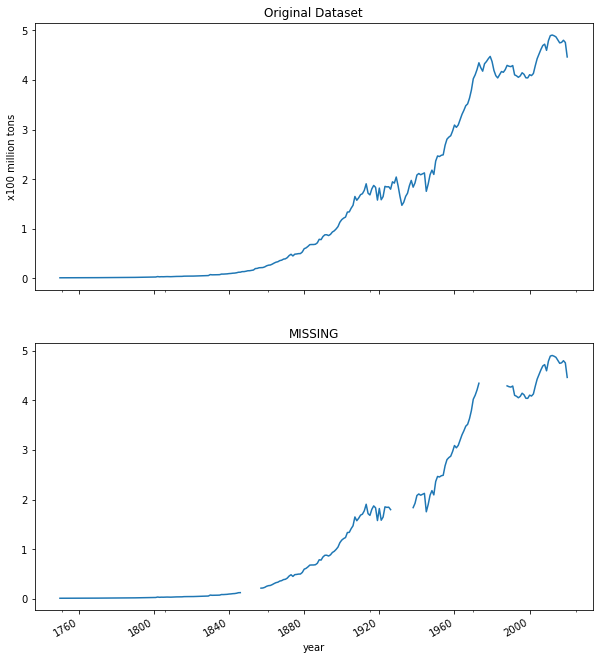

In [237]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")

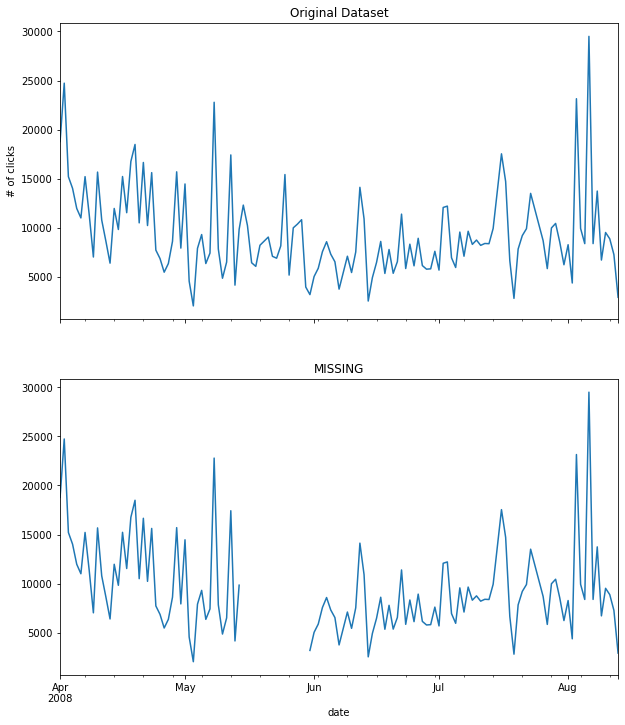

In [238]:
plot_dfs(clicks_original, 
         clicks_missing, 
         'clicks',
         title="Page Clicks per Day",
         xlabel="date",
         ylabel="# of clicks")

In [245]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [246]:
co2_missing['ffil'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

In [247]:
scores = rmse_score(co2_original, 
                    co2_missing, 
                    'co2')

RMSE for ffil: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


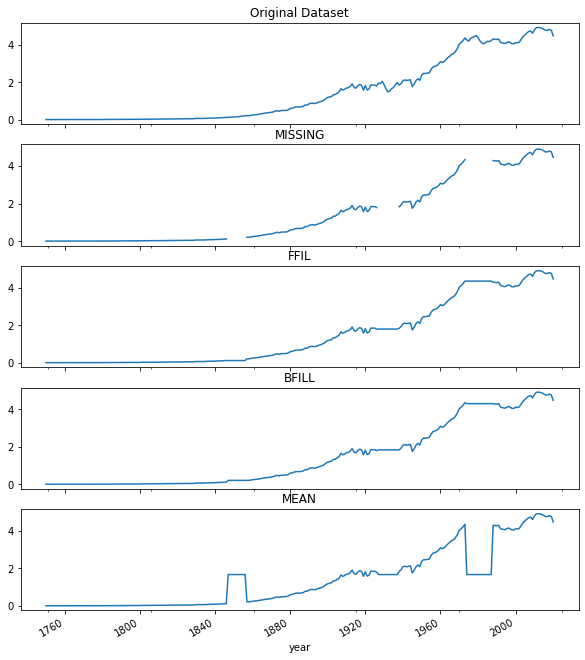

In [248]:
plot_dfs(co2_original, co2_missing, 'co2')

In [249]:
clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

In [250]:
scores = rmse_score(clicks_original, 
                    clicks_missing, 
                    'clicks')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


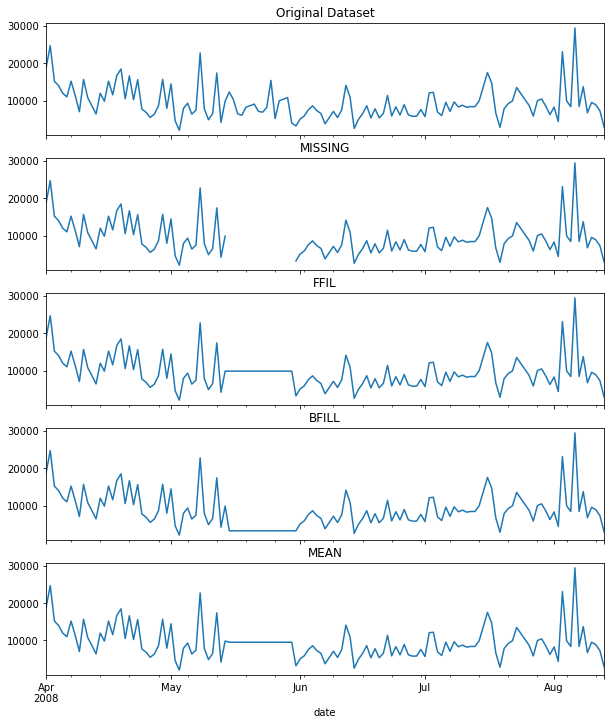

In [251]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

### There is More

In [252]:
co2_missing['co2'].ffill()
co2_missing['co2'].bfill()
clicks_missing['clicks'].ffill()
clicks_missing['clicks'].bfill()

date
2008-04-01    18784.0
2008-04-02    24738.0
2008-04-03    15209.0
2008-04-04    14018.0
2008-04-05    11974.0
               ...   
2008-08-09     6716.0
2008-08-10     9523.0
2008-08-11     8881.0
2008-08-12     7272.0
2008-08-13     2922.0
Name: clicks, Length: 135, dtype: float64

# Handling Missing Data with Univariate Imputation using Scikit-Learn

In [334]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from pathlib import Path

In [335]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 
                            'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 
                           'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 
                               'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                              'clicks_missing.csv', 'date')

In [336]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    
    fig.suptitle = title
    #fig.tight_layout()
    
    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

In [337]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [338]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [339]:
for s_name, s in strategy:
    co2_vals = co2_missing['co2'].values.reshape(-1,1)
    clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)
    co2_missing[s_name] = (SimpleImputer(strategy=s)
                               .fit_transform(co2_vals))
    clicks_missing[s_name] = (SimpleImputer(strategy=s)
                                .fit_transform(clicks_vals))
    
    

In [340]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for Mean Strategy: 0.7156383637041684
RMSE for Median Strategy: 0.8029421606859859
RMSE for Most Frequent Strategy: 1.1245663822743381


In [341]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for Mean Strategy: 997.7600138929953
RMSE for Median Strategy: 959.3580492530756
RMSE for Most Frequent Strategy: 1097.6425985146868


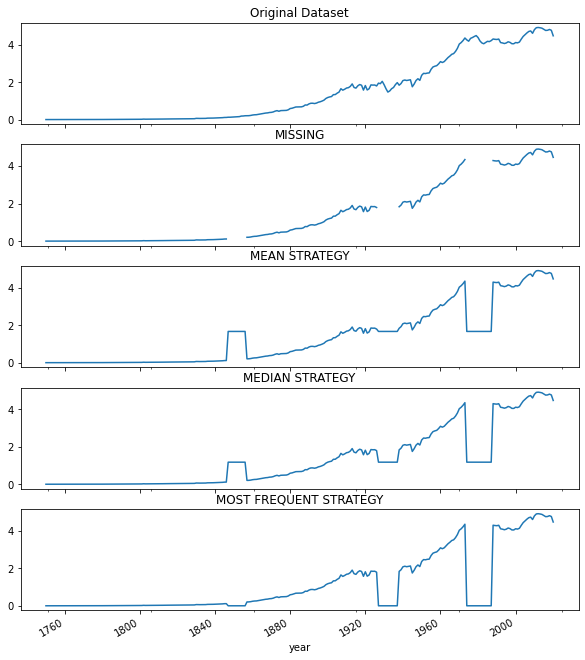

In [342]:
plot_dfs(co2_original, co2_missing, 'co2')

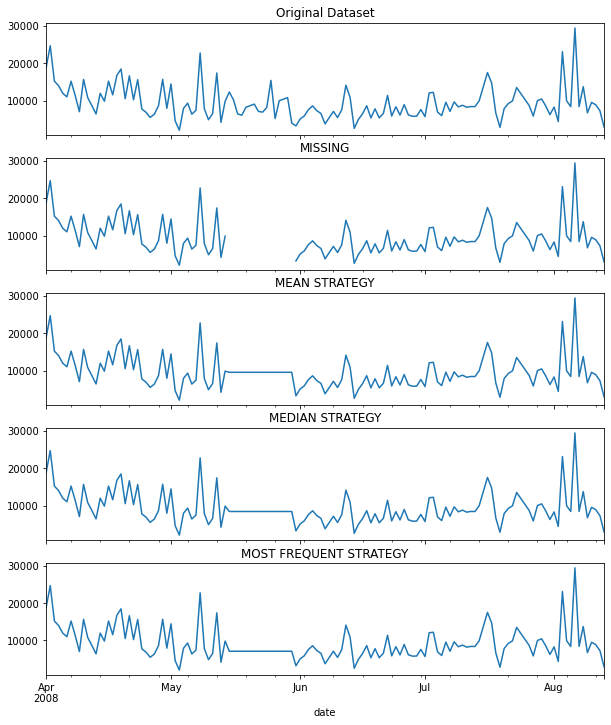

In [343]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## There is more

In [344]:
avg = co2_missing['co2'].mean()
co2_missing['pands_fillna'] = co2_missing['co2'].fillna(avg)

In [345]:
co2_missing

,co2,Mean Strategy,Median Strategy,Most Frequent Strategy,pands_fillna
year,,,,,
1750-01-01,0.0125,0.0125,0.0125,0.0125,0.0125
1760-01-01,0.0128,0.0128,0.0128,0.0128,0.0128
1770-01-01,0.0150,0.0150,0.0150,0.0150,0.0150
1780-01-01,0.0169,0.0169,0.0169,0.0169,0.0169
1790-01-01,0.0206,0.0206,0.0206,0.0206,0.0206
...,...,...,...,...,...
2016-01-01,4.7496,4.7496,4.7496,4.7496,4.7496
2017-01-01,4.7595,4.7595,4.7595,4.7595,4.7595
2018-01-01,4.8022,4.8022,4.8022,4.8022,4.8022


In [346]:
cols = ['co2', 'Mean Strategy', 'pands_fillna']
_ = rmse_score(co2_original, co2_missing[cols], 'co2')

RMSE for Mean Strategy: 0.7156383637041684
RMSE for pands_fillna: 0.7156383637041684


# Handling Missing Data with Multivariate Imputation

In [347]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [348]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [363]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    
    fig.suptitle = title
    fig.tight_layout()
    
    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

In [364]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [365]:
folder = Path('../../datasets/Ch7/')

clicks_original = read_dataset(folder, 
                            'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                            'clicks_missing.csv', 'date')

In [366]:
clicks_missing.isna().sum()

price        0
location     0
clicks      16
dtype: int64

In [367]:
estimators = [
    ('bayesianRidge', BayesianRidge()),
    ('extra_trees', ExtraTreesRegressor(n_estimators=10)),
    ('bagging', BaggingRegressor(n_estimators=10)),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
]


In [368]:
clicks_vals = clicks_missing.iloc[:,0:3].values

for e_name, e in estimators:
    est = IterativeImputer(
                random_state=15,
                estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[: , 2]

    
    

/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [369]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.439397345585
RMSE for extra_trees: 1808.7353896719806
RMSE for bagging: 1336.6903517990218
RMSE for elastic_net: 945.4075209343101
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822


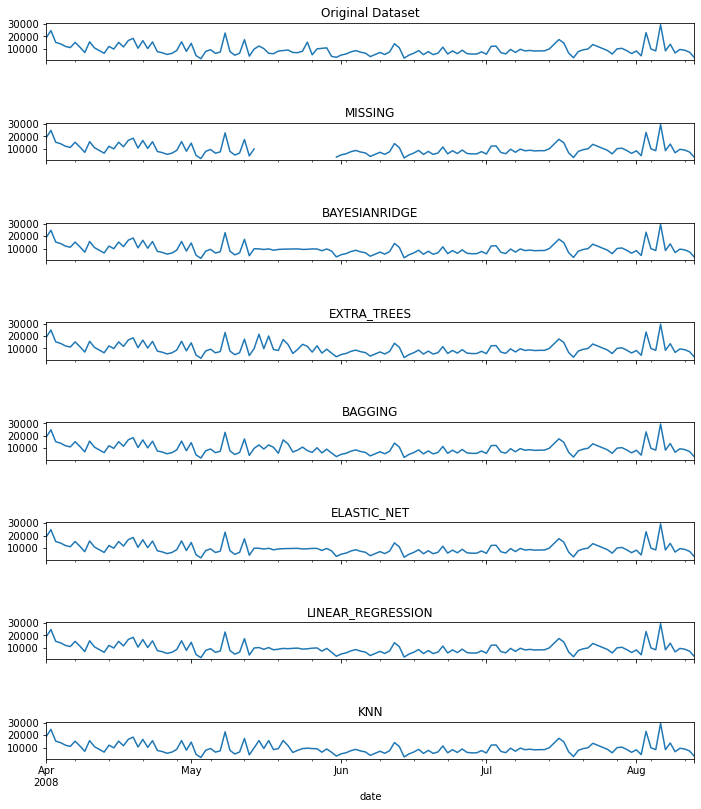

In [370]:

plot_dfs(clicks_original, clicks_missing, 'clicks')

### There is more

In [371]:
from statsmodels.imputation.mice import MICE, MICEData, MICEResults
import statsmodels.api as sm

In [372]:
# create a MICEData object
fltr = ['price', 'location','clicks']
mice_data = MICEData(clicks_missing[fltr], 
                     perturbation_method='gaussian')
# 20 iterations
mice_data.update_all(n_iter=20)

mice_data.set_imputer('clicks', formula='~ price + location', model_class=sm.OLS)

In [373]:
clicks_missing['MICE']  = mice_data.data['clicks'].values.tolist()

In [374]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.439397345585
RMSE for extra_trees: 1808.7353896719806
RMSE for bagging: 1336.6903517990218
RMSE for elastic_net: 945.4075209343101
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822
RMSE for MICE: 1834.5978204944436


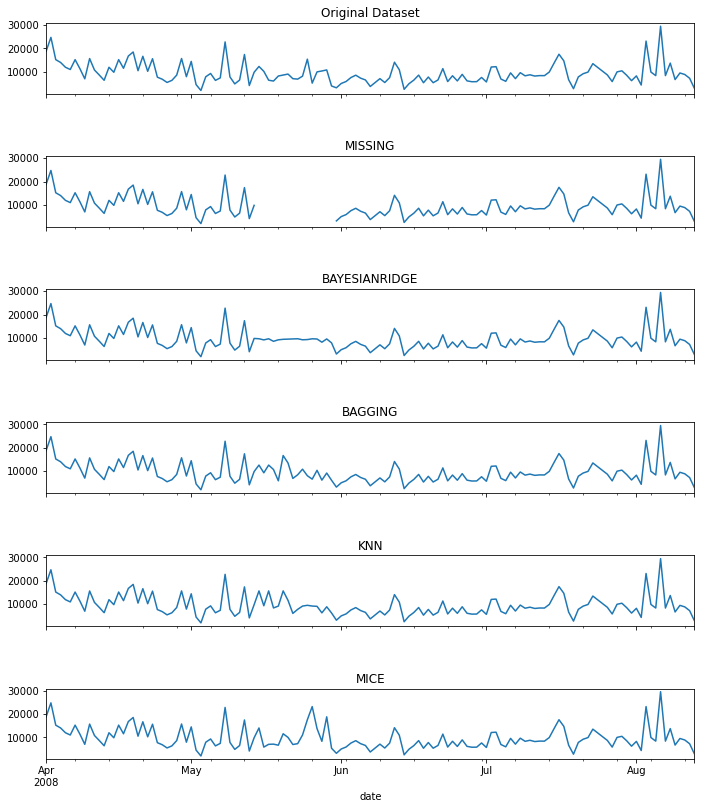

In [377]:
cols = ['clicks','bayesianRidge', 'bagging', 'knn', 'MICE']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

# Handling Missing Data with Interpolation

In [65]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [66]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [67]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    
    fig.suptitle = title
    
    
    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

In [68]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [69]:
folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 
                            'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 
                           'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 
                               'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                              'clicks_missing.csv', 'date')

In [70]:
interpolations = [
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]

for intp in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)


co2_missing['spline'] = \
        co2_missing['co2'].interpolate(method='spline', order=2)
clicks_missing['spline'] = \
        clicks_missing['clicks'].interpolate(method='spline',order=2)

co2_missing['polynomial'] = \
        co2_missing['co2'].interpolate(method='polynomial',order=5)
clicks_missing['polynomial'] = \
        clicks_missing['clicks'].interpolate(method='polynomial',order=5)



In [71]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347
RMSE for nearest: 0.05385422309469095
RMSE for cubic: 0.08373627305833133
RMSE for spline: 0.1878602347541416
RMSE for polynomial: 0.06728323553134927


In [72]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626975
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782831
RMSE for spline: 5222.922993448641
RMSE for polynomial: 56757.29323647127


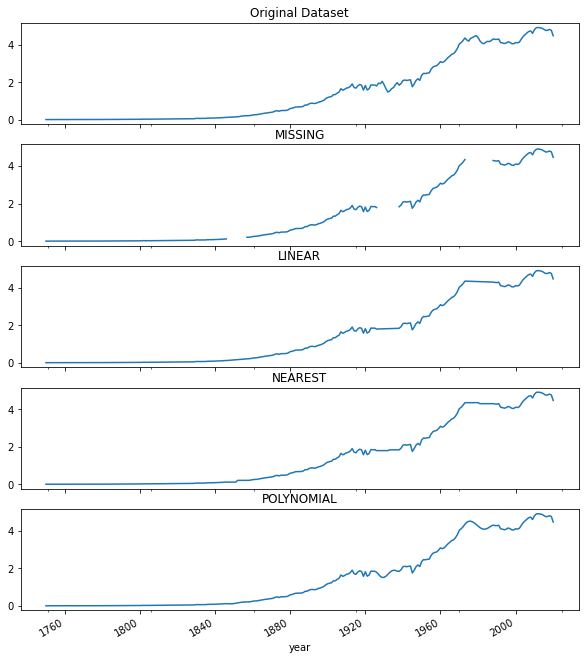

In [73]:
cols = ['co2', 'linear', 'nearest', 'polynomial']
plot_dfs(co2_original, co2_missing[cols], 'co2')

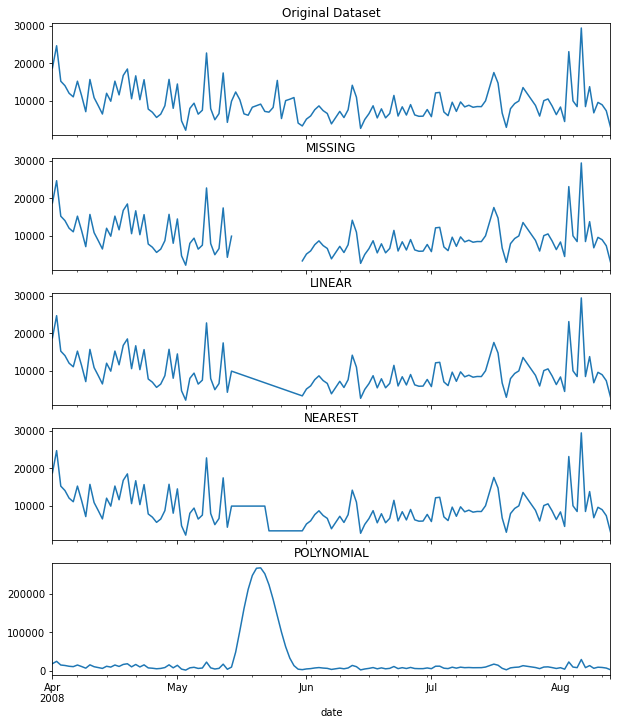

In [74]:
cols = ['clicks', 'linear', 'nearest', 'polynomial']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

# Resampling Time Series Data

In [75]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [76]:
df = web.DataReader('TSLA', 'yahoo', start='2020-01-01', end='2021-11-01')

In [77]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [78]:
df.shape

(463, 6)

In [79]:
df_downsampled = df.resample('3D').last()
df_downsampled.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-05,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997
2020-01-11,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000
2020-01-14,102.891998,98.433998,98.750000,102.697998,108683500.0,102.697998


In [80]:
df_downsampled.index

DatetimeIndex(['2020-01-02', '2020-01-05', '2020-01-08', '2020-01-11',
               '2020-01-14', '2020-01-17', '2020-01-20', '2020-01-23',
               '2020-01-26', '2020-01-29',
               ...
               '2021-10-05', '2021-10-08', '2021-10-11', '2021-10-14',
               '2021-10-17', '2021-10-20', '2021-10-23', '2021-10-26',
               '2021-10-29', '2021-11-01'],
              dtype='datetime64[ns]', name='Date', length=224, freq='3D')

In [81]:
df_downsampled.index.freq

<3 * Days>

In [82]:
df_downsampled = df.resample('3B').last()
df_downsampled.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998
2020-01-10,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000
2020-01-15,103.134003,100.632004,101.522003,102.099998,68145500.0,102.099998
2020-01-20,118.900002,111.820000,114.377998,113.912003,156845000.0,113.912003


In [88]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()
# df_quarterly = df.resample('Q').mean()

In [89]:
weekly_return = df_weekly['Close'].pct_change()
monthly_return = df_monthly['Close'].pct_change()
# quarterly_return = df_quarterly['Close'].pct_change()

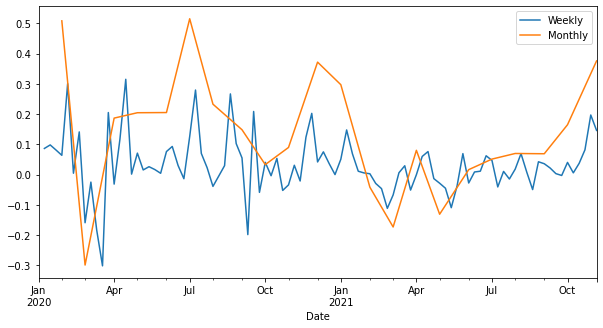

In [90]:
plt.figure(figsize=(10,5))
weekly_return.plot(label='Weekly')
monthly_return.plot(label='Monthly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

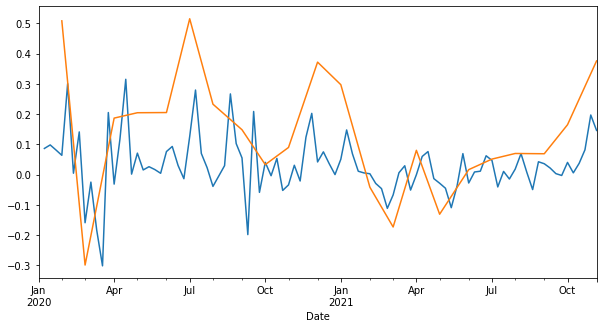

In [96]:
# similary this can be reduced into shorter steps
plt.figure(figsize=(10,5))
df.resample('W').mean()['Close'].pct_change().plot()
df.resample('M').mean()['Close'].pct_change().plot()

# Dealing with Outliers in Time Series Data

In [ ]:
from pyod.models import iforest